In [1]:
import pandas as pd
from bs4 import BeautifulSoup as BS
import requests

In [2]:
url="https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"

In [3]:
page=requests.get(url)

In [4]:
soup=BS(page.content,'html')

In [5]:
table=soup.find_all('table')[1]

In [6]:
th=table.find_all('th')

In [7]:
header=[h.text.strip() for h in th]

In [8]:
df=pd.DataFrame(columns=header)

In [9]:
tr=table.find_all('tr')

In [10]:
all_row_data=[]

In [11]:
for r in tr:
    row_data=r.find_all('td')
    individual_row_data=[row.text.strip() for row in row_data]
    all_row_data.append(individual_row_data)

In [12]:
all_row_data=all_row_data[1:]

In [13]:
for index in range(len(all_row_data)):
    df.loc[index]=all_row_data[index]

In [14]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [15]:
df['Revenue (USD millions)']=df['Revenue (USD millions)'].str.replace(',', '.').astype(float)

In [16]:
df['Revenue growth']=df['Revenue growth'].str.replace('%', '').astype(float)

In [17]:
df.groupby('Industry')[["Revenue (USD millions)",'Name']].max()[:10].sort_values(by='Revenue (USD millions)',ascending=False)

,Revenue (USD millions),Name
Industry,,
Conglomerate,302.089,RTX Corporation
Automotive industry,158.057,General Motors
Beverage,86.859,PepsiCo
Automotive and energy,81.462,Tesla
Aerospace and defense,66.608,Lockheed Martin
Chemical industry,56.902,Dow Chemical Company
Agriculture manufacturing,52.577,John Deere
Airline,50.582,United Airlines
Agriculture cooperative,47.194,CHS


In [18]:
df.groupby('Industry')[["Revenue (USD millions)",'Name']].min()[:10].sort_values(by='Revenue (USD millions)',ascending=False)

,Revenue (USD millions),Name
Industry,,
Automotive industry,156.735,Ford Motor Company
Beverage,86.859,PepsiCo
Automotive and energy,81.462,Tesla
Conglomerate,67.074,Berkshire Hathaway
Aerospace and defense,65.984,Boeing
Chemical industry,56.902,Dow Chemical Company
Agriculture manufacturing,52.577,John Deere
Agriculture cooperative,47.194,CHS
Apparel,46.710,Nike


In [19]:
df.groupby('Industry')[["Revenue growth",'Name']].max()[:10].sort_values(by='Revenue growth',ascending=False)

,Revenue growth,Name
Industry,,
Airline,82.5,United Airlines
Automotive and energy,51.4,Tesla
Agriculture cooperative,24.3,CHS
Automotive industry,23.4,General Motors
Agriculture manufacturing,19.4,John Deere
Conglomerate,9.4,RTX Corporation
Beverage,8.7,PepsiCo
Aerospace and defense,6.9,Lockheed Martin
Apparel,4.9,Nike


In [20]:
df.groupby('Industry')[["Revenue growth",'Name']].min()[:10].sort_values(by='Revenue growth',ascending=False)

,Revenue growth,Name
Industry,,
Airline,63.9,American Airlines
Automotive and energy,51.4,Tesla
Agriculture cooperative,24.3,CHS
Agriculture manufacturing,19.4,John Deere
Automotive industry,15.9,Ford Motor Company
Beverage,8.7,PepsiCo
Apparel,4.9,Nike
Chemical industry,3.5,Dow Chemical Company
Conglomerate,3.2,Berkshire Hathaway


<Axes: xlabel='Name'>

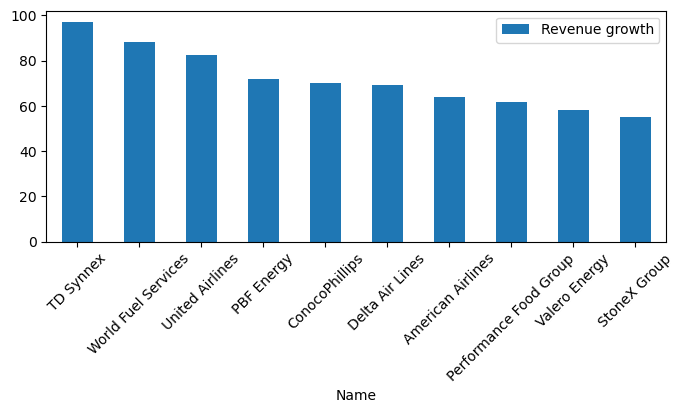

In [21]:
df.sort_values(by='Revenue growth',ascending=False)[:10].plot(rot=45,kind='bar',x='Name',y='Revenue growth',figsize=(8,3),legend=True)

<Axes: xlabel='Name'>

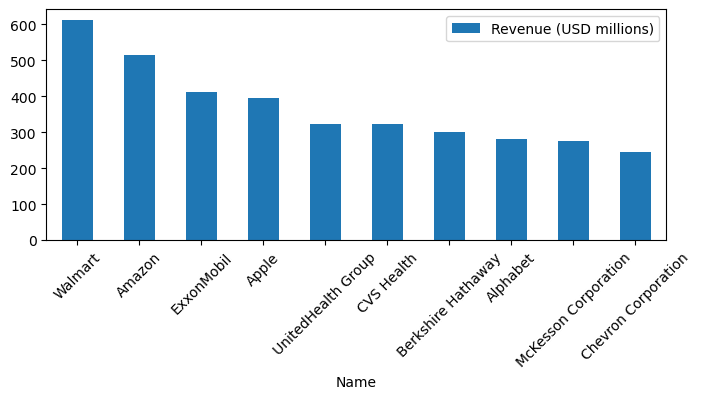

In [22]:
df.sort_values(by='Revenue (USD millions)',ascending=False)[:10].plot(rot=45,kind='bar',x='Name',y='Revenue (USD millions)',figsize=(8,3),legend=True)

In [23]:
df.to_csv(r"C:\Users\Basel\Desktop\Data Analysis Projects\Python Webscrapping Beautiful Soup\Companies Revenues.csv")